In [1]:
import os
import joblib
import pickle
from IPython.display import Audio


import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
split_rate = 0.2
seed = 42
n_cores = int(os.cpu_count()/2)
print(f'The half of the number of threads available is : {n_cores}')

The half of the number of threads available is : 8


In [3]:
df = pd.read_csv('pd_speech_features.csv', header=1)
df.set_index("id", inplace = True)
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 251
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.4 MB


In [5]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
print(f'Number of duplicated columns : {df.columns.duplicated().sum()}')

df = df.loc[:,~df.columns.duplicated()] # drop duplicated columns if present

Number of duplicated columns : 0


In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Checking for missing values

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [9]:
df=df.sample(frac=1).reset_index(drop=True)# Resample data
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,0.15963,0.71769,0.69724,282,277,0.006283,0.002353,0.00430,0.000027,...,7.1960,6.6202,4.8074,2.7155,3.0016,3.0518,3.4973,11.8213,26.7293,1
1,1,0.80364,0.63710,0.32641,312,311,0.006178,0.000058,0.00121,0.000007,...,92.5920,55.3886,22.3646,7.2949,3.5975,2.9812,2.7438,2.3858,3.6652,0
2,0,0.82040,0.65289,0.53007,312,311,0.006176,0.000050,0.00115,0.000007,...,17.7977,4.8675,2.8679,2.8406,2.8767,2.8260,3.3111,3.4931,3.2550,1
3,1,0.80489,0.62426,0.47446,285,284,0.006776,0.000072,0.00150,0.000010,...,3.8931,24.6627,14.1003,13.2342,15.4761,11.3094,7.0092,6.3474,9.0822,1
4,0,0.76197,0.63410,0.36172,396,395,0.004877,0.000042,0.00098,0.000005,...,4.0034,3.6167,3.2602,3.2759,3.0769,3.2721,5.4248,10.6982,23.5983,0


In [10]:
fig = px.histogram(df, x = 'class', color = 'gender', barmode = 'group', title = 'Class repartition betwenn genders')
fig.show()
print(f'Unbalanced data')

Unbalanced data


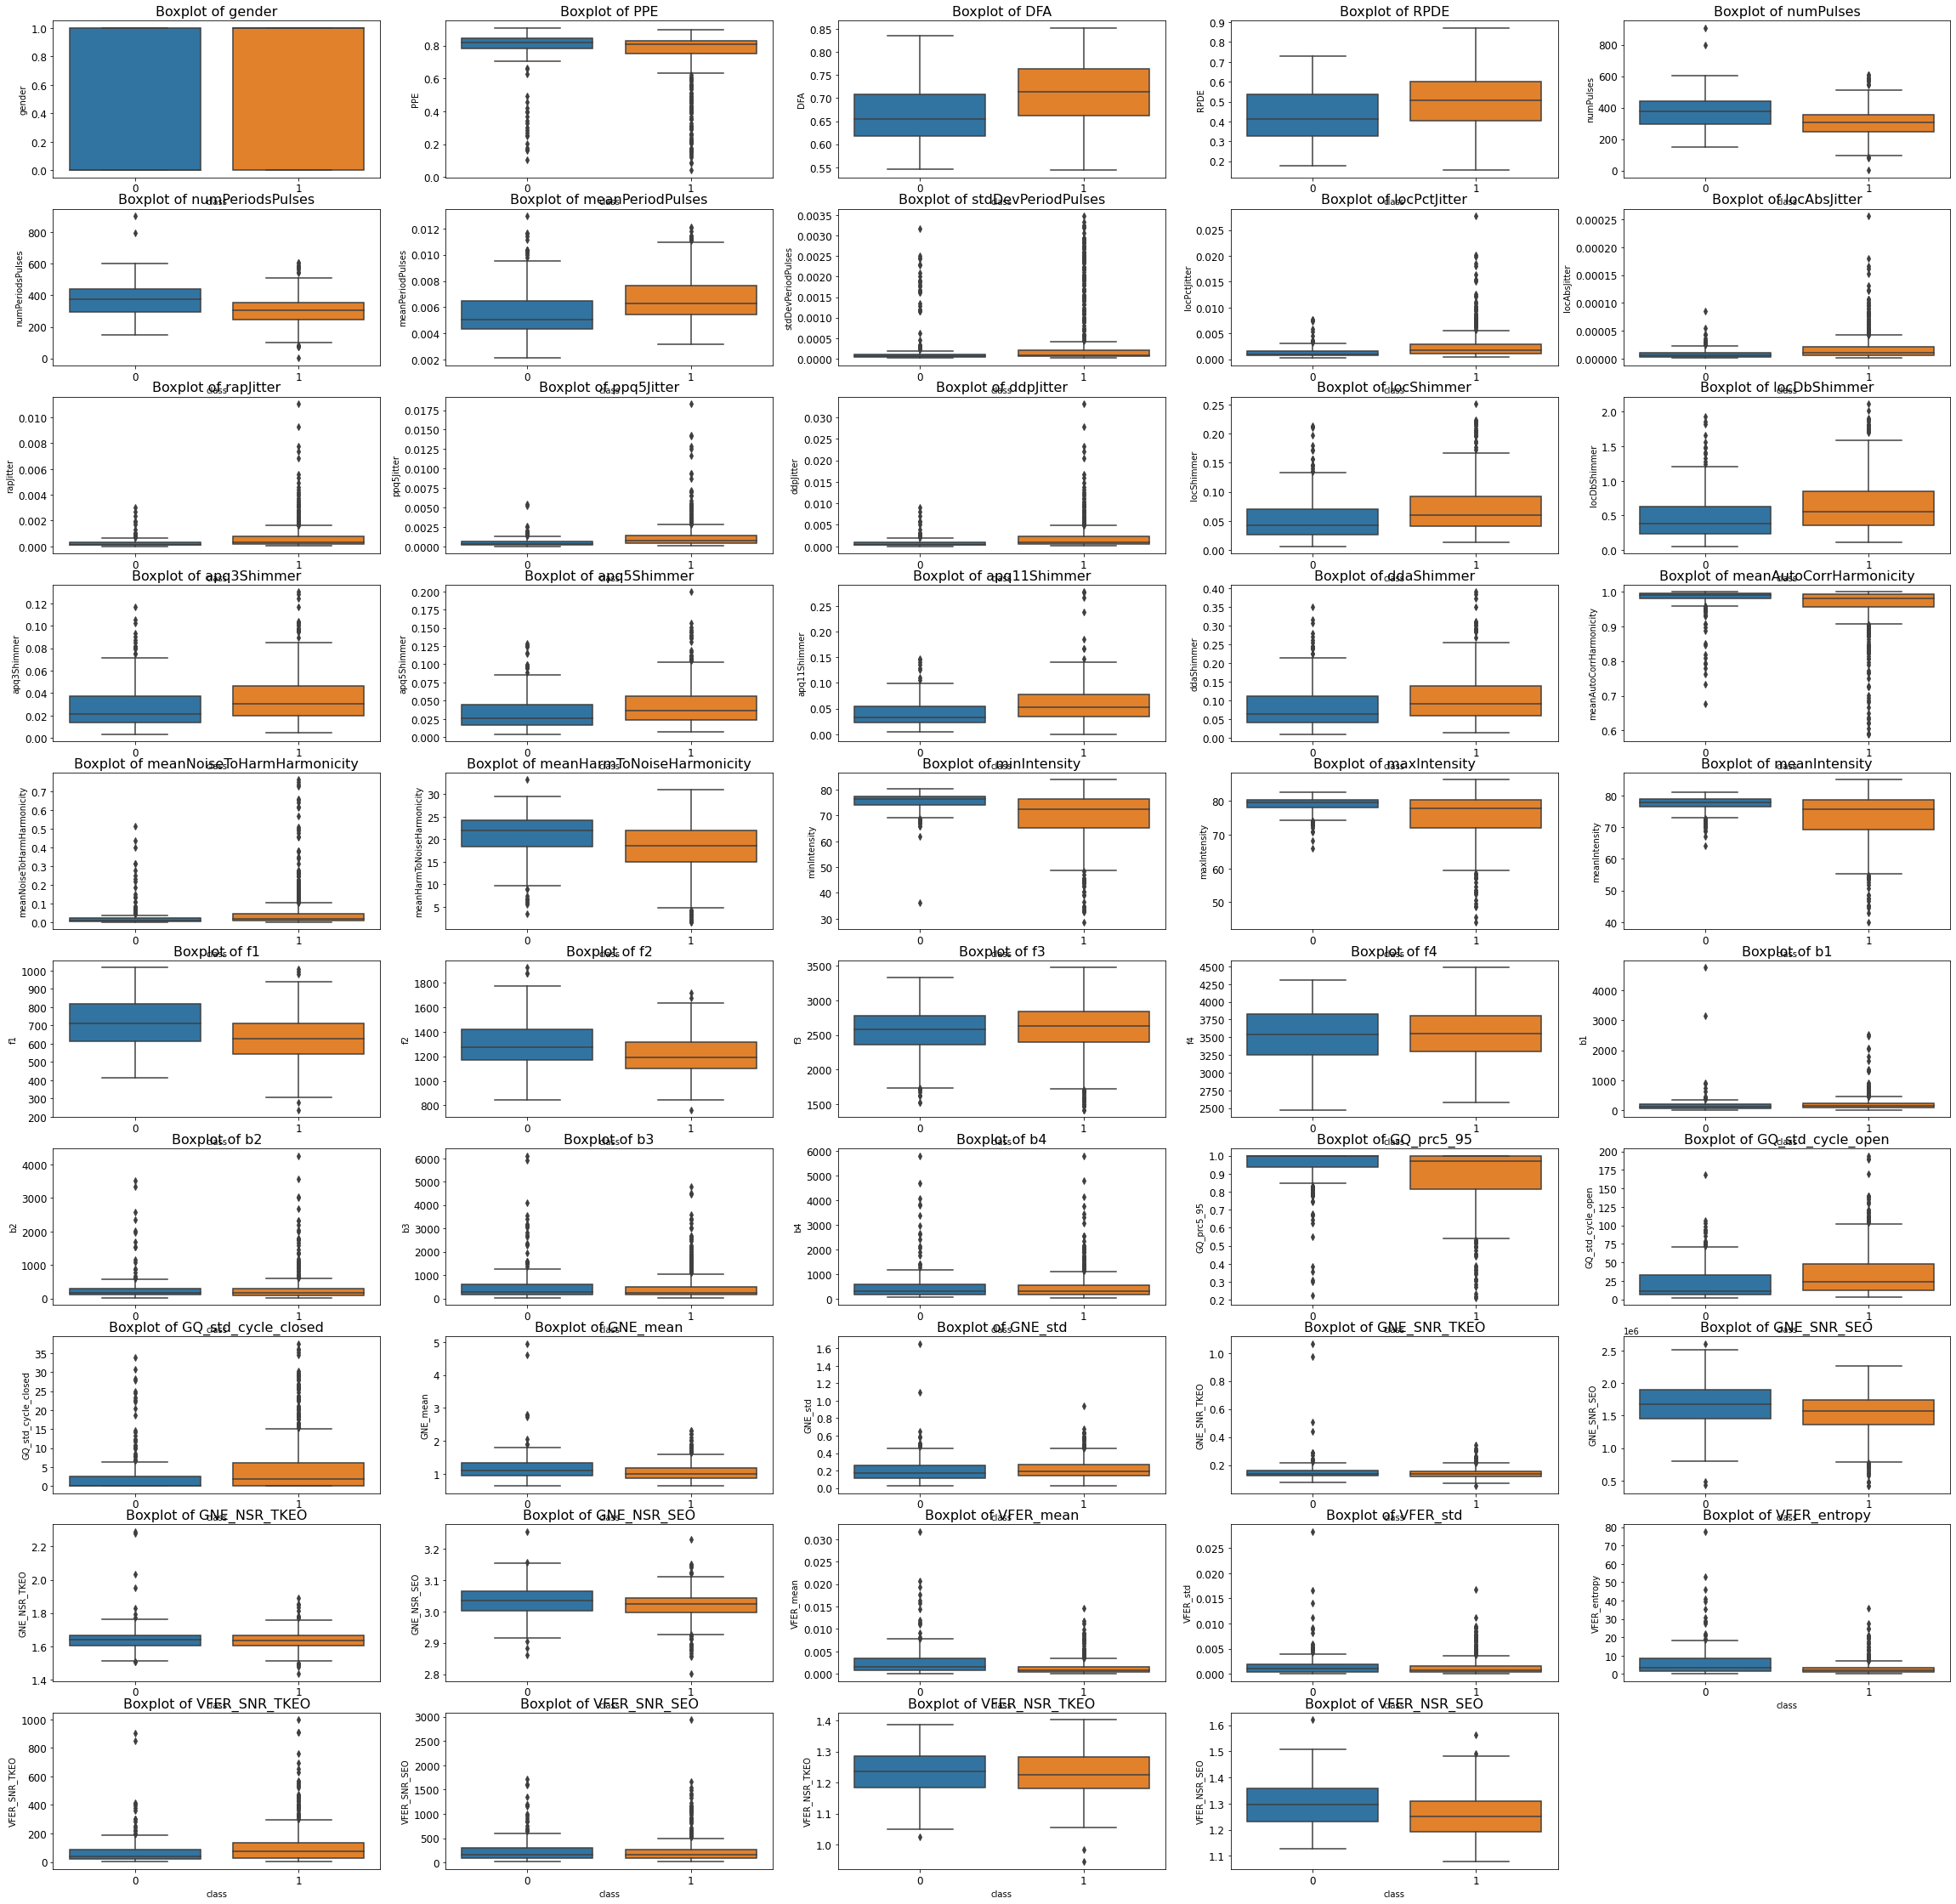

In [11]:
#Box Plotting All features distribution corresponding Target column
plt.figure(figsize=(40,40))
for idx, c in enumerate(df.columns[:49]):
    plt.subplot(10,5,idx+1)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['class'])
plt.show()

# Machine Learning

## Data Splitting

In [12]:
features = df.drop('class', axis=1)
labels = df['class']

In [13]:
print(f'Shape of features : {features.shape}')
print(f'Shape of labels : {labels.shape}')

Shape of features : (756, 753)
Shape of labels : (756,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = split_rate, random_state = seed, stratify = labels)

In [15]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')

print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (604, 753)
Shape of y_train : (604,)
Shape of X_test : (152, 753)
Shape of y_test : (152,)


In [16]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, random_state = seed)

In [17]:
# print(f'Shape of X_test : {X_test.shape}')
# print(f'Shape of y_test : {y_test.shape}')

# print(f'Shape of X_val : {X_val.shape}')
# print(f'Shape of y_val : {y_val.shape}')


## Scaling Data

In [18]:
scaler = StandardScaler() # Substract mean and divide by standard deviation

df_scaled = scaler.fit_transform(df.drop('class', axis  = 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_val = scaler.fit_transform(X_val)

### Logistic Regression

In [19]:
LR_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_parameters = [{ 'penalty' : ['l1','l2'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_grid_search = GridSearchCV(estimator = LR_classifier, param_grid = LR_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_grid_search = LR_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.74669421        nan        nan 0.74669421 0.81283747 0.85100551
 0.85100551 0.84100551 0.74669421        nan        nan 0.74669421
 0.81283747 0.85100551 0.85100551 0.85263085 0.74669421        nan
        nan 0.74669421 0.81283747 0.85100551 0.85100551 0.85100551
 0.83607438        nan        nan 0.83610193 0.83435262 0.85757576
 0.85757576 0.81946281 0.83607438        nan        nan 0.83115702
 0.83435262 0.85757576 0.85757576 0.83932507 0.83607438        nan
        nan 0.83115702 0.83435262 0.85757576 0.85757576 0.83931129
 0.84092287        nan        nan 0.82608815 0.82936639 0.84592287
 0.84592287 0.82607438 0.84092287        nan        nan 0.84097796
 0.82936639 0.84592287 0.84592287 0.8376584  0.84092287        nan
        nan 0.84263085 0.829366

In [20]:
print(f'Best logistic regressor is : {LR_grid_search.best_estimator_}, \n  with a score of : {LR_grid_search.best_score_}')


Best logistic regressor is : LogisticRegression(C=0.1, random_state=42, solver='newton-cg'), 
  with a score of : 0.8575757575757577


In [21]:
y_pred_LR =  LR_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LR) 
print (cm)

print(classification_report(y_test,y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR)*100)

[[ 25  14]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        39
           1       0.88      0.90      0.89       113

    accuracy                           0.84       152
   macro avg       0.79      0.77      0.78       152
weighted avg       0.83      0.84      0.83       152

Accuracy: 83.55263157894737


### SVM

In [22]:
SVM_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_grid_search = GridSearchCV(estimator = SVM_classifier, param_grid = SVM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_grid_search = SVM_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [23]:
print(f'Best SVM is : {SVM_grid_search.best_estimator_}, \n  with a score of : {SVM_grid_search.best_score_}')


Best SVM is : SVC(C=10.0, decision_function_shape='ovo', random_state=42), 
  with a score of : 0.8741460055096419


In [24]:
y_pred_SVM =  SVM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM) 
print (cm)

print(classification_report(y_test,y_pred_SVM))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM)*100)

[[ 26  13]
 [  4 109]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        39
           1       0.89      0.96      0.93       113

    accuracy                           0.89       152
   macro avg       0.88      0.82      0.84       152
weighted avg       0.89      0.89      0.88       152

Accuracy: 88.81578947368422


### Gaussian Naive Bayes

In [25]:
GNB_classifier = GaussianNB()
GNB_grid_search = GNB_classifier.fit(X_train, y_train)

In [26]:
y_pred_GNB =  GNB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB) 
print (cm)

print(classification_report(y_test,y_pred_GNB))
print("Accuracy:",accuracy_score(y_test, y_pred_GNB)*100)

[[31  8]
 [31 82]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        39
           1       0.91      0.73      0.81       113

    accuracy                           0.74       152
   macro avg       0.71      0.76      0.71       152
weighted avg       0.81      0.74      0.76       152

Accuracy: 74.3421052631579


### Decision Tree

In [27]:
DT_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_grid_search = GridSearchCV(estimator = DT_classifier, param_grid = DT_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_grid_search = DT_grid_search.fit(X_train, y_train)
print('DT trained')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
DT trained


In [28]:
print(f'Best Decison Tree is : {DT_grid_search.best_estimator_}, \n  with a score of : {DT_grid_search.best_score_}')
print('\n')

y_pred_DT =  DT_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT) 
print (cm)

print(classification_report(y_test,y_pred_DT))
print("Accuracy:",accuracy_score(y_test, y_pred_DT)*100)

Best Decison Tree is : DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=10, random_state=42,
                       splitter='random'), 
  with a score of : 0.8062121212121213


[[21 18]
 [15 98]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        39
           1       0.84      0.87      0.86       113

    accuracy                           0.78       152
   macro avg       0.71      0.70      0.71       152
weighted avg       0.78      0.78      0.78       152

Accuracy: 78.28947368421053


In [29]:
RF_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_grid_search = GridSearchCV(estimator = RF_classifier, param_grid = RF_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_grid_search = RF_grid_search.fit(X_train, y_train)
print('RF trained')




Fitting 5 folds for each of 720 candidates, totalling 3600 fits
RF trained


In [30]:
print(f'Best Random Forest is : {RF_grid_search.best_estimator_}, \n  with a score of : {RF_grid_search.best_score_}')
print('\n')

y_pred_RF =  RF_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF) 
print (cm)

print(classification_report(y_test,y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF)*100)

Best Random Forest is : RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=10,
                       n_estimators=50, random_state=42), 
  with a score of : 0.8526584022038568


[[ 28  11]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.91      0.93      0.92       113

    accuracy                           0.88       152
   macro avg       0.84      0.82      0.83       152
weighted avg       0.87      0.88      0.87       152

Accuracy: 87.5


### Bagging Claissifier

In [31]:
BG_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_grid_search = GridSearchCV(estimator = BG_classifier, param_grid = BG_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_grid_search = BG_grid_search.fit(X_train, y_train)
print('Bagging Classifier trained ! ')





Fitting 5 folds for each of 24 candidates, totalling 120 fits
Bagging Classifier trained ! 


In [32]:
print(f'Best BAgging Classifier is : {BG_grid_search.best_estimator_}, \n  with a score of : {BG_grid_search.best_score_}')
print('\n')

y_pred_BG =  BG_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_BG) 
print (cm)

print(classification_report(y_test,y_pred_BG))
print("Accuracy:",accuracy_score(y_test, y_pred_BG)*100)

Best BAgging Classifier is : BaggingClassifier(max_features=50, n_estimators=20, random_state=42), 
  with a score of : 0.8476446280991736


[[29 10]
 [14 99]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.71        39
           1       0.91      0.88      0.89       113

    accuracy                           0.84       152
   macro avg       0.79      0.81      0.80       152
weighted avg       0.85      0.84      0.84       152

Accuracy: 84.21052631578947


### KNN

In [33]:
KNN_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_grid_search = KNN_grid_search.fit(X_train, y_train)
print('KNN trained ! ')





Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN trained ! 


In [34]:
print(f'Best KNN Classifier is : {KNN_grid_search.best_estimator_}, \n  with a score of : {KNN_grid_search.best_score_}')
print('\n')

y_pred_KNN =  KNN_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN) 
print (cm)

print(classification_report(y_test,y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN)*100)

Best KNN Classifier is : KNeighborsClassifier(n_neighbors=10, weights='distance'), 
  with a score of : 0.8378099173553718


[[ 18  21]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.61        39
           1       0.84      0.98      0.91       113

    accuracy                           0.85       152
   macro avg       0.87      0.72      0.76       152
weighted avg       0.86      0.85      0.83       152

Accuracy: 84.86842105263158


### Ada Boost

In [35]:
ADAB_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_grid_search = GridSearchCV(estimator = ADAB_classifier, param_grid = ADAB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_grid_search = ADAB_grid_search.fit(X_train, y_train)
print('ADAB trained ! ')




Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB trained ! 


In [36]:
print(f'Best ADAB Classifier is : {ADAB_grid_search.best_estimator_}, \n  with a score of : {ADAB_grid_search.best_score_}')
print('\n')

y_pred_ADAB =  ADAB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ADAB) 
print (cm)

print(classification_report(y_test,y_pred_ADAB))
print("Accuracy:",accuracy_score(y_test, y_pred_ADAB)*100)

Best ADAB Classifier is : AdaBoostClassifier(n_estimators=100, random_state=42), 
  with a score of : 0.8625619834710744


[[31  8]
 [16 97]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        39
           1       0.92      0.86      0.89       113

    accuracy                           0.84       152
   macro avg       0.79      0.83      0.81       152
weighted avg       0.86      0.84      0.85       152

Accuracy: 84.21052631578947


### Gradient Boosting Classifier

In [37]:
GB_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_grid_search = GridSearchCV(estimator = GB_classifier, param_grid = GB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_grid_search = GB_grid_search.fit(X_train, y_train)
print('GB trained ! ')







Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB trained ! 


In [38]:
print(f'Best GB Classifier is : {GB_grid_search.best_estimator_}, \n  with a score of : {GB_grid_search.best_score_}')
print('\n')

y_pred_GB =  GB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GB) 
print (cm)

print(classification_report(y_test,y_pred_GB))
print("Accuracy:",accuracy_score(y_test, y_pred_GB)*100)

Best GB Classifier is : GradientBoostingClassifier(random_state=42), 
  with a score of : 0.8675619834710744


[[ 33   6]
 [ 13 100]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        39
           1       0.94      0.88      0.91       113

    accuracy                           0.88       152
   macro avg       0.83      0.87      0.84       152
weighted avg       0.89      0.88      0.88       152

Accuracy: 87.5


### XGB Classifier

In [39]:
XGB_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_parameters = [{'nthread': [n_cores], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_grid_search = GridSearchCV(estimator = XGB_classifier, param_grid = XGB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_grid_search = XGB_grid_search.fit(X_train, y_train)
print('XGB trained ! ')







Fitting 5 folds for each of 144 candidates, totalling 720 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[22:45:27] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:45:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitl

In [40]:
print(f'Best XGB Classifier is : {XGB_grid_search.best_estimator_}, \n  with a score of : {XGB_grid_search.best_score_}')
print('\n')

y_pred_XGB =  XGB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_XGB) 
print (cm)

print(classification_report(y_test,y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB)*100)

Best XGB Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=-999, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None), 
  with a score of : 0.8543388429752067


[[ 21  18]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        39
           1       0.86      0.95      0.90       113

    accuracy                           0.84       152
   macro avg       0.82      0.74      0.77       152
weighted a

### LGBM Classifier

In [41]:
LGBM_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBMoost may become slower
              'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_grid_search = GridSearchCV(estimator = LGBM_classifier, param_grid = LGBM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_grid_search = LGBM_grid_search.fit(X_train, y_train)
print('LGBM trained ! ')









Fitting 5 folds for each of 288 candidates, totalling 1440 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

LGBM trained ! 


In [42]:
print(f'Best LGBM Classifier is : {LGBM_grid_search.best_estimator_}, \n  with a score of : {LGBM_grid_search.best_score_}')
print('\n')

y_pred_LGBM =  LGBM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LGBM) 
print (cm)

print(classification_report(y_test,y_pred_LGBM))
print("Accuracy:",accuracy_score(y_test, y_pred_LGBM)*100)

Best LGBM Classifier is : LGBMClassifier(max_depth=20, num_leaves=50, random_state=42), 
  with a score of : 0.8891046831955922


[[ 32   7]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.94      0.98      0.96       113

    accuracy                           0.94       152
   macro avg       0.94      0.90      0.92       152
weighted avg       0.94      0.94      0.94       152

Accuracy: 94.07894736842105


## Saving models

In [43]:
print('test')

models_dict = {
    'logistic_regression' : LR_grid_search.best_estimator_,
    'SVM' : SVM_grid_search.best_estimator_,
    'Gaussian Naive Bayes' : GNB_classifier,
    'Decision Tree' : DT_grid_search.best_estimator_,
    'Bagging' : BG_grid_search.best_estimator_,
    'KNN' : KNN_grid_search.best_estimator_,
    'Ada Boost' : ADAB_grid_search.best_estimator_,
    'Gradient Bossting' : GB_grid_search.best_estimator_,
    'XGB' : XGB_grid_search.best_estimator_,
    'LGBM' : LGBM_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


test
/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian Naive Bayes.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision Tree.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada Boost.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient Bossting.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM.sav


# Reloading models

In [44]:
models_path_dict = {
    'logistic_regression' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression.sav',
    'SVM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM.sav',
    'Gaussian_Naive_Bayes' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian Naive Bayes.sav' ,
    'Decision_Tree' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision Tree.sav',
    'Bagging' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging.sav',
    'KNN' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN.sav',
    'Ada_Boost' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada Boost.sav',
    'Gradient_Bossting' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient Bossting.sav',
    'XGB' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB.sav',
    'LGBM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM.sav'

}

models_dict = {}

for key, value in models_path_dict.items():

    models_dict[str(key)] = pickle.load(open(value, 'rb'))


# Models' evaluation

In [45]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores = []
names = []

for name, model in models_dict.items():
    scores = cross_val_score(model, df_scaled, df['class'], scoring = 'f1_weighted', cv = cv, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores.append(scores)
    names.append(name)

print('Evaluation done !')


logistic_regression : Mean ROC 0.8384147187495739 STD:(0.008198758180181535)
SVM : Mean ROC 0.8848355089679893 STD:(0.023862394118588266)
Gaussian_Naive_Bayes : Mean ROC 0.7845949483083341 STD:(0.03674142062204303)
Decision_Tree : Mean ROC 0.7771739239216722 STD:(0.031249598854648956)
Bagging : Mean ROC 0.8541641518986296 STD:(0.016897926736365268)
KNN : Mean ROC 0.8251584212908437 STD:(0.0337773061600343)
Ada_Boost : Mean ROC 0.8884530792832643 STD:(0.020467312472765006)
Gradient_Bossting : Mean ROC 0.8881279579418948 STD:(0.01796926354172696)
XGB : Mean ROC 0.87117099706789 STD:(0.012819604795017725)
LGBM : Mean ROC 0.9099462720767546 STD:(0.020000147795281874)
Evaluation done !


# Ploting first results

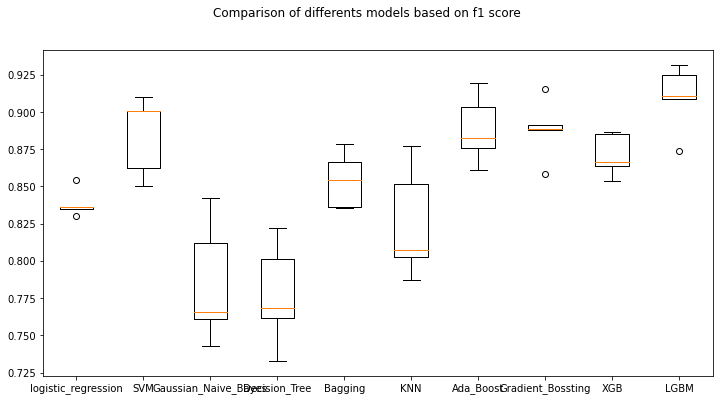

In [46]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(f1_scores)
ax.set_xticklabels(names)
fig.suptitle('Comparison of differents models based on f1 score')
plt.show()

# PCA

In [47]:
pca = PCA(n_components = 20, random_state = seed)
pca.fit(df_scaled)

print(f'Variance ratios are : \n \n {pca.explained_variance_ratio_} \n')
print(f'Sum of variance ratios is  : {pca.explained_variance_ratio_.sum()}')

Variance ratios are : 
 
 [0.12961998 0.09390046 0.08252524 0.04290164 0.03566432 0.0299512
 0.02510273 0.02214611 0.02035206 0.0182389  0.01767102 0.01495244
 0.01306856 0.01272897 0.01267692 0.01167645 0.01068159 0.01058348
 0.00949644 0.00935444] 

Sum of variance ratios is  : 0.6232929507468548


In [48]:
def plot_cum_variance(pca_transformer):

    plt.bar(range(0,len(pca_transformer.explained_variance_ratio_)), pca_transformer.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained                                      variance')
    plt.step(range(0,len(np.cumsum(pca_transformer.explained_variance_ratio_))), np.cumsum(pca_transformer.explained_variance_ratio_), where='mid',label='Cumulative                                         explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

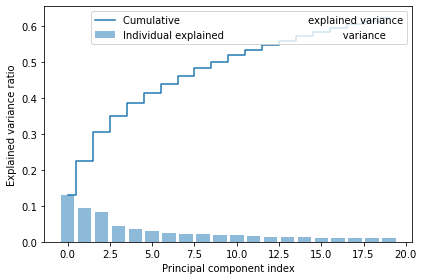

In [49]:
plot_cum_variance(pca)

In [50]:
def define_n_component_pca(data, percentage):

    n_comp = 2
    n_comp_optimal = True
    pca = PCA(n_components = n_comp, random_state = seed)
    pca.fit(data)
    current_percentage = np.sum(pca.explained_variance_ratio_)

    while n_comp_optimal : 

        # print(current_percentage)

        if current_percentage > percentage : 

            pca = PCA(n_components = n_comp, random_state = seed)
            pca.fit(data)
            # print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
            n_comp_optimal = False
            

        else :

            # print('Adding one more component')
            n_comp += 1
            pca = PCA( n_components = n_comp, random_state = seed)
            pca.fit(data)
            current_percentage = np.sum(pca.explained_variance_ratio_)

        
    print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
    return pca



Number of principal component is : 61, with a cumulative variance of : 0.8020190681039301


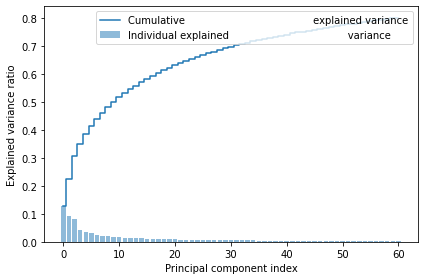

In [51]:
optimised_pca = define_n_component_pca(df_scaled, 0.8)
plot_cum_variance(optimised_pca)

In [52]:
df_scaled_pca = optimised_pca.fit_transform(df_scaled)

print(f'PCA reduction returns a dataset compressed and scaled of shape : {df_scaled_pca.shape}')

PCA reduction returns a dataset compressed and scaled of shape : (756, 61)


In [53]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_scaled_pca, labels, test_size = split_rate, random_state = seed, stratify = labels)

print(f'Shape of X_train_pca : {X_train_pca.shape}')
print(f'Shape of y_train_pca : {y_train_pca.shape}')

print(f'Shape of X_test_pca : {X_test_pca.shape}')
print(f'Shape of y_train_pca : {y_test_pca.shape}')

Shape of X_train_pca : (604, 61)
Shape of y_train_pca : (604,)
Shape of X_test_pca : (152, 61)
Shape of y_train_pca : (152,)


## Training models


### Logistic Regression

In [54]:
LR_PCA_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_PCA_parameters = [{ 'penalty' : ['l1','l2'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_PCA_grid_search = GridSearchCV(estimator = LR_PCA_classifier, param_grid = LR_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_PCA_grid_search = LR_PCA_grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.70028926        nan        nan 0.80466942 0.81618457 0.84604683
 0.84604683 0.8311708  0.70028926        nan        nan 0.80633609
 0.81618457 0.84604683 0.84604683 0.84439394 0.70028926        nan
        nan 0.8046832  0.81618457 0.84604683 0.84604683 0.8477135
 0.84272727        nan        nan 0.84107438 0.81953168 0.82446281
 0.82446281 0.82285124 0.84272727        nan        nan 0.84104683
 0.81953168 0.82446281 0.82446281 0.82782369 0.84272727        nan
        nan 0.85101928 0.81953168 0.82446281 0.82446281 0.82782369
 0.82946281        nan        nan 0.81954545 0.82612948 0.82779614
 0.82779614 0.81455923 0.82946281        nan        nan 0.82615702
 0.82612948 0.82779614 0.82779614 0.82115702 0.82946281        nan
        nan 0.82285124 0.8261294

In [55]:
print(f'Best logistic regressor is : {LR_PCA_grid_search.best_estimator_}, \n  with a score of : {LR_PCA_grid_search.best_score_}')


y_pred_LR_PCA =  LR_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LR_PCA) 
print (cm)

print(classification_report(y_test,y_pred_LR_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_LR_PCA)*100)

Best logistic regressor is : LogisticRegression(C=0.1, max_iter=500, penalty='l1', random_state=42,
                   solver='saga'), 
  with a score of : 0.8510192837465566
[[ 21  18]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        39
           1       0.86      0.97      0.91       113

    accuracy                           0.86       152
   macro avg       0.87      0.76      0.79       152
weighted avg       0.86      0.86      0.85       152

Accuracy: 86.18421052631578


### SVM

In [56]:
SVM_PCA_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_PCA_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_PCA_grid_search = GridSearchCV(estimator = SVM_PCA_classifier, param_grid = SVM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_PCA_grid_search = SVM_PCA_grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [57]:
print(f'Best SVM_PCA is : {SVM_PCA_grid_search.best_estimator_}, \n  with a score of : {SVM_PCA_grid_search.best_score_}')

y_pred_SVM_PCA =  SVM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_SVM_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_SVM_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM_PCA)*100)

Best SVM_PCA is : SVC(C=10.0, decision_function_shape='ovo', random_state=42), 
  with a score of : 0.8775068870523416
[[ 27  12]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.90      0.97      0.94       113

    accuracy                           0.90       152
   macro avg       0.90      0.83      0.86       152
weighted avg       0.90      0.90      0.90       152

Accuracy: 90.13157894736842


### Gaussian Naive Bayes

In [58]:
GNB_PCA_classifier = GaussianNB()
GNB_PCA_grid_search = GNB_PCA_classifier.fit(X_train_pca, y_train_pca)

In [59]:
y_pred_GNB_PCA =  GNB_PCA_classifier.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GNB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GNB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GNB_PCA)*100)

[[14 25]
 [15 98]]
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        39
           1       0.80      0.87      0.83       113

    accuracy                           0.74       152
   macro avg       0.64      0.61      0.62       152
weighted avg       0.72      0.74      0.72       152

Accuracy: 73.68421052631578


### Decision Tree

In [60]:
DT_PCA_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_PCA_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_PCA_grid_search = GridSearchCV(estimator = DT_PCA_classifier, param_grid = DT_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_PCA_grid_search = DT_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('DT_PCA trained')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
DT_PCA trained


In [61]:
print(f'Best Decison Tree is : {DT_PCA_grid_search.best_estimator_}, \n  with a score of : {DT_PCA_grid_search.best_score_}')
print('\n')

y_pred_DT_PCA =  DT_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_DT_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_DT_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_DT_PCA)*100)

Best Decison Tree is : DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=10, random_state=42,
                       splitter='random'), 
  with a score of : 0.7665702479338843


[[  6  33]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        39
           1       0.76      0.95      0.85       113

    accuracy                           0.74       152
   macro avg       0.63      0.55      0.54       152
weighted avg       0.70      0.74      0.69       152

Accuracy: 74.3421052631579


### Random Forest

In [62]:
RF_PCA_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_PCA_grid_search = GridSearchCV(estimator = RF_PCA_classifier, param_grid = RF_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_PCA_grid_search = RF_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('RF_PCA trained')


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
RF_PCA trained


In [63]:
print(f'Best Random Forest is : {RF_PCA_grid_search.best_estimator_}, \n  with a score of : {RF_PCA_grid_search.best_score_}')
print('\n')

y_pred_RF_PCA =  RF_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_RF_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_RF_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_RF_PCA)*100)

Best Random Forest is : RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=50,
                       random_state=42), 
  with a score of : 0.8278236914600552


[[ 18  21]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.61        39
           1       0.84      0.98      0.91       113

    accuracy                           0.85       152
   macro avg       0.87      0.72      0.76       152
weighted avg       0.86      0.85      0.83       152

Accuracy: 84.86842105263158


### Bagging Classifier

In [64]:

BG_PCA_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_PCA_grid_search = GridSearchCV(estimator = BG_PCA_classifier, param_grid = BG_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_PCA_grid_search = BG_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('Bagging Classifier trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.76819559 0.7615427  0.76818182 0.77982094 0.77484848 0.77152893
 0.7814876  0.79800275 0.82451791 0.82782369 0.82618457 0.82121212
 0.81128099 0.83942149 0.84104683 0.84439394 0.85103306 0.84938017
        nan        nan        nan        nan        nan        nan]

Bagging Classifier trained ! 


In [65]:
print(f'Best BAgging Classifier is : {BG_PCA_grid_search.best_estimator_}, \n  with a score of : {BG_PCA_grid_search.best_score_}')
print('\n')

y_pred_BG_PCA =  BG_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_BG_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_BG_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_BG_PCA)*100)

Best BAgging Classifier is : BaggingClassifier(max_features=50, n_estimators=250, random_state=42), 
  with a score of : 0.8510330578512397


[[ 23  16]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69        39
           1       0.87      0.96      0.91       113

    accuracy                           0.86       152
   macro avg       0.85      0.77      0.80       152
weighted avg       0.86      0.86      0.85       152

Accuracy: 86.18421052631578


### KNN

In [66]:
KNN_PCA_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_PCA_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_PCA_grid_search = GridSearchCV(estimator = KNN_PCA_classifier, param_grid = KNN_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_PCA_grid_search = KNN_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('KNN_PCA trained ! ')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN_PCA trained ! 


In [67]:
print(f'Best KNN_PCA Classifier is : {KNN_PCA_grid_search.best_estimator_}, \n  with a score of : {KNN_PCA_grid_search.best_score_}')
print('\n')

y_pred_KNN_PCA =  KNN_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_KNN_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_KNN_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_KNN_PCA)*100)

Best KNN_PCA Classifier is : KNeighborsClassifier(n_neighbors=10, weights='distance'), 
  with a score of : 0.8444077134986226


[[ 24  15]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        39
           1       0.88      0.96      0.92       113

    accuracy                           0.87       152
   macro avg       0.85      0.79      0.81       152
weighted avg       0.87      0.87      0.86       152

Accuracy: 86.8421052631579


### Ada Boost

In [68]:
ADAB_PCA_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_PCA_grid_search = GridSearchCV(estimator = ADAB_PCA_classifier, param_grid = ADAB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_PCA_grid_search = ADAB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('ADAB_PCA trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB_PCA trained ! 


In [69]:
print(f'Best ADAB_PCA Classifier is : {ADAB_PCA_grid_search.best_estimator_}, \n  with a score of : {ADAB_PCA_grid_search.best_score_}')
print('\n')

y_pred_ADAB_PCA =  ADAB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_ADAB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_ADAB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_ADAB_PCA)*100)

Best ADAB_PCA Classifier is : AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42), 
  with a score of : 0.8261570247933884


[[ 19  20]
 [  4 109]]
              precision    recall  f1-score   support

           0       0.83      0.49      0.61        39
           1       0.84      0.96      0.90       113

    accuracy                           0.84       152
   macro avg       0.84      0.73      0.76       152
weighted avg       0.84      0.84      0.83       152

Accuracy: 84.21052631578947


### Gradient Bossting Classifier

In [70]:
GB_PCA_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_PCA_grid_search = GridSearchCV(estimator = GB_PCA_classifier, param_grid = GB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_PCA_grid_search = GB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('GB_PCA trained ! ')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB_PCA trained ! 


In [71]:
print(f'Best GB_PCA Classifier is : {GB_PCA_grid_search.best_estimator_}, \n  with a score of : {GB_PCA_grid_search.best_score_}')
print('\n')

y_pred_GB_PCA =  GB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GB_PCA)*100)

Best GB_PCA Classifier is : GradientBoostingClassifier(n_estimators=250, random_state=42), 
  with a score of : 0.8576308539944903


[[ 22  17]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.79      0.56      0.66        39
           1       0.86      0.95      0.90       113

    accuracy                           0.85       152
   macro avg       0.82      0.76      0.78       152
weighted avg       0.84      0.85      0.84       152

Accuracy: 84.86842105263158


### XGB Classifier

In [72]:
XGB_PCA_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_PCA_parameters = [{'nthread': [n_cores], #when use hyperthread, XGB_PCAoost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_PCA_grid_search = GridSearchCV(estimator = XGB_PCA_classifier, param_grid = XGB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_PCA_grid_search = XGB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('XGB_PCA trained ! ')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[22:56:17] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:56:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB_PCA trained ! 
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode yo

In [73]:
print(f'Best XGB_PCA Classifier is : {XGB_PCA_grid_search.best_estimator_}, \n  with a score of : {XGB_PCA_grid_search.best_score_}')
print('\n')

y_pred_XGB_PCA =  XGB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_XGB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_XGB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_XGB_PCA)*100)

Best XGB_PCA Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=-999, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None), 
  with a score of : 0.8394352617079889


[[ 19  20]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.76      0.49      0.59        39
           1       0.84      0.95      0.89       113

    accuracy                           0.83       152
   macro avg       0.80      0.72      0.74       152
weighte

#### LGBM CLassifier

In [74]:
LGBM_PCA_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_PCA_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBM_PCAoost may become slower
              'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_PCA_grid_search = GridSearchCV(estimator = LGBM_PCA_classifier, param_grid = LGBM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_PCA_grid_search = LGBM_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('LGBM_PCA trained ! ')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
LGBM_PCA trained ! 


In [75]:
print(f'Best LGBM_PCA Classifier is : {LGBM_PCA_grid_search.best_estimator_}, \n  with a score of : {LGBM_PCA_grid_search.best_score_}')
print('\n')

y_pred_LGBM_PCA =  LGBM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LGBM_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_LGBM_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_LGBM_PCA)*100)

Best LGBM_PCA Classifier is : LGBMClassifier(boosting_type='goss', max_depth=10, num_leaves=50,
               random_state=42), 
  with a score of : 0.8626308539944902


[[ 19  20]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.58        39
           1       0.84      0.94      0.89       113

    accuracy                           0.82       152
   macro avg       0.79      0.71      0.74       152
weighted avg       0.81      0.82      0.81       152

Accuracy: 82.23684210526315


### Saving models

In [76]:
models_pca_dict = {
    'logistic_regression_pca' : LR_PCA_grid_search.best_estimator_,
    'SVM_pca' : SVM_PCA_grid_search.best_estimator_,
    'Gaussian_Naive_Bayes_pca' : GNB_PCA_classifier,
    'Decision_Tree_pca' : DT_PCA_grid_search.best_estimator_,
    'Bagging_pca' : BG_PCA_grid_search.best_estimator_,
    'KNN_pca' : KNN_PCA_grid_search.best_estimator_,
    'Ada_Boost_pca' : ADAB_PCA_grid_search.best_estimator_,
    'Gradient_Boosting_pca' : GB_PCA_grid_search.best_estimator_,
    'XGB_pca' : XGB_PCA_grid_search.best_estimator_,
    'LGBM_pca' : LGBM_PCA_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_pca_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav


### Reloading models

In [77]:
models_path_dict = {
    'logistic_regression_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav',
    'SVM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav',
    'Gaussian_Naive_Bayes_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav' ,
    'Decision_Tree_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav',
    'Bagging_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav',
    'KNN_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav',
    'Ada_Boost_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav',
    'Gradient_Boosting_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav',
    'XGB_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav',
    'LGBM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav'

}

models_dict = {}

for key, value in models_path_dict.items():

    models_dict[str(key)] = pickle.load(open(value, 'rb'))